# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

After you have identified yoru best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasds around handling class imbalance or about how to test multiple different models and their tuning parameters, but you should still look at doing those to see if they help you to create a better predictive model.


# Good Luck

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movie_train.csv', index_col=0)

In [3]:
df.head()

,Release Year,Title,Plot,Director,Cast,Genre
10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action


### Task #2: Check for missing values:

In [4]:
# Check for NaN values:

df.isnull().sum()

Release Year      0
Title             0
Plot              0
Director          0
Cast            169
Genre             0
dtype: int64

In [5]:
# Check for whitespace strings (it's OK if there aren't any!):









### Task #3: Remove NaN values:

### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. 

In [6]:
df.Genre.value_counts()

drama        3770
comedy       2724
horror        840
action        830
thriller      685
romance       649
western       525
adventure     331
crime         328
Name: Genre, dtype: int64

In [9]:
!pip install srsly

    100% |████████████████████████████████| 450kB 6.8MB/s ta 0:00:01
thinc 7.3.1 requires cymem<2.1.0,>=2.0.2, which is not installed.
thinc 7.3.1 requires murmurhash<1.1.0,>=0.28.0, which is not installed.
thinc 7.3.1 requires plac<1.2.0,>=0.9.6, which is not installed.
thinc 7.3.1 requires wasabi<1.1.0,>=0.0.9, which is not installed.
spacy 2.2.3 requires cymem<2.1.0,>=2.0.2, which is not installed.
spacy 2.2.3 requires murmurhash<1.1.0,>=0.28.0, which is not installed.
spacy 2.2.3 requires plac<1.2.0,>=0.9.6, which is not installed.
spacy 2.2.3 requires wasabi<1.1.0,>=0.4.0, which is not installed.
thinc 7.3.1 has requirement srsly<1.1.0,>=0.0.6, but you'll have srsly 2.4.1 which is incompatible.
spacy 2.2.3 has requirement catalogue<1.1.0,>=0.0.7, but you'll have catalogue 2.0.3 which is incompatible.
spacy 2.2.3 has requirement srsly<1.1.0,>=0.1.0, but you'll have srsly 2.4.1 which is incompatible.
  Found existing installation: catalogue 0.0.8
    Uninstalling catalogue-0.0.8:
  

In [11]:
!Pip install cymem

thinc 7.3.1 requires murmurhash<1.1.0,>=0.28.0, which is not installed.
thinc 7.3.1 requires plac<1.2.0,>=0.9.6, which is not installed.
thinc 7.3.1 requires wasabi<1.1.0,>=0.0.9, which is not installed.
spacy 2.2.3 requires murmurhash<1.1.0,>=0.28.0, which is not installed.
spacy 2.2.3 requires plac<1.2.0,>=0.9.6, which is not installed.
spacy 2.2.3 requires wasabi<1.1.0,>=0.4.0, which is not installed.
preshed 3.0.2 requires murmurhash<1.1.0,>=0.28.0, which is not installed.
thinc 7.3.1 has requirement srsly<1.1.0,>=0.0.6, but you'll have srsly 2.4.1 which is incompatible.
spacy 2.2.3 has requirement catalogue<1.1.0,>=0.0.7, but you'll have catalogue 2.0.3 which is incompatible.
spacy 2.2.3 has requirement srsly<1.1.0,>=0.1.0, but you'll have srsly 2.4.1 which is incompatible.


In [13]:
!pip install murmurhash

thinc 7.3.1 requires plac<1.2.0,>=0.9.6, which is not installed.
thinc 7.3.1 requires wasabi<1.1.0,>=0.0.9, which is not installed.
spacy 2.2.3 requires plac<1.2.0,>=0.9.6, which is not installed.
spacy 2.2.3 requires wasabi<1.1.0,>=0.4.0, which is not installed.
thinc 7.3.1 has requirement srsly<1.1.0,>=0.0.6, but you'll have srsly 2.4.1 which is incompatible.
spacy 2.2.3 has requirement catalogue<1.1.0,>=0.0.7, but you'll have catalogue 2.0.3 which is incompatible.
spacy 2.2.3 has requirement srsly<1.1.0,>=0.1.0, but you'll have srsly 2.4.1 which is incompatible.


In [14]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(text):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(text)
    
#     mytokens = [word for word in mytokens if word.pos_ != "PROPN"]
    
    mytokens = [ word if word.pos_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

AttributeError: type object 'spacy.syntax.nn_parser.array' has no attribute '__reduce_cython__'

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



In [9]:
df['tokenized']= df['Plot'].apply(spacy_tokenizer)

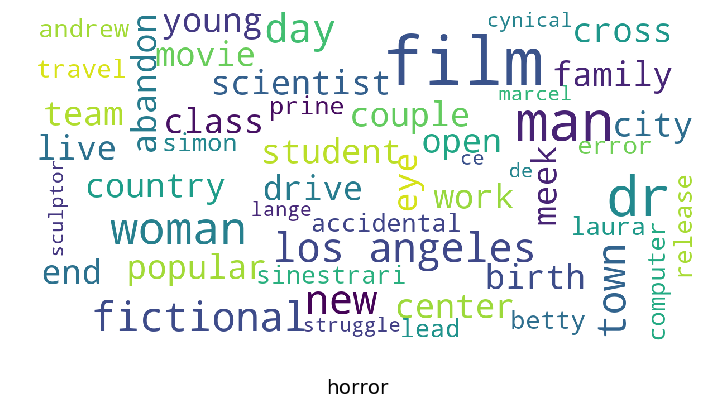

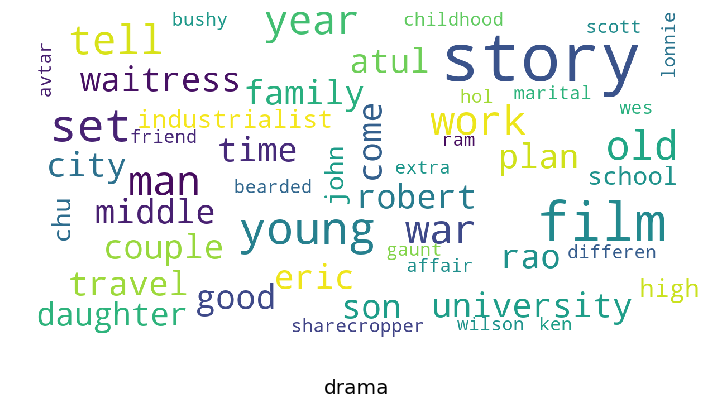

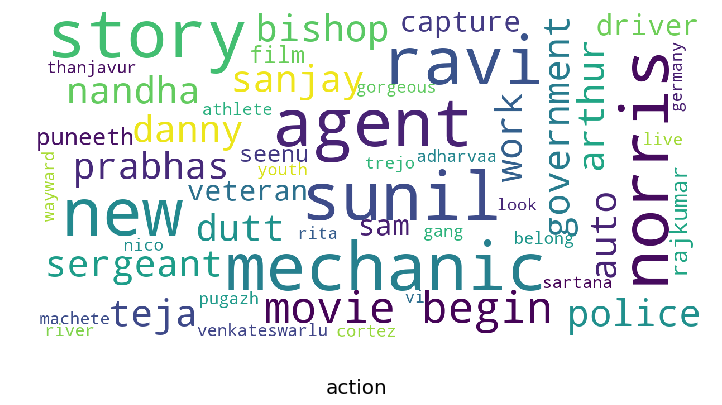

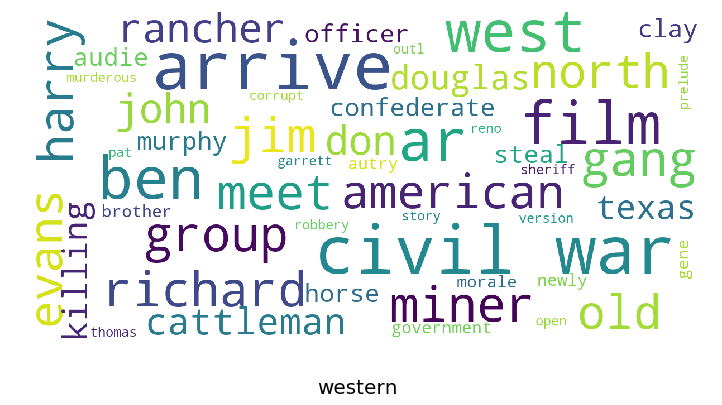

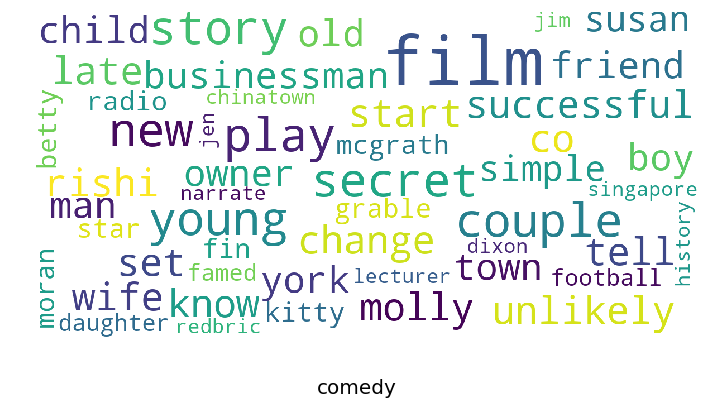

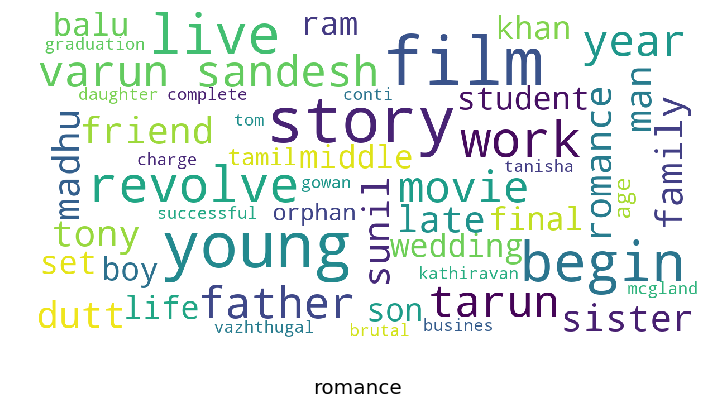

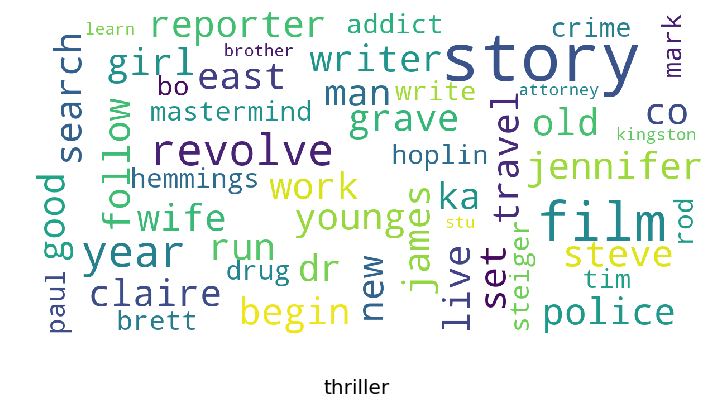

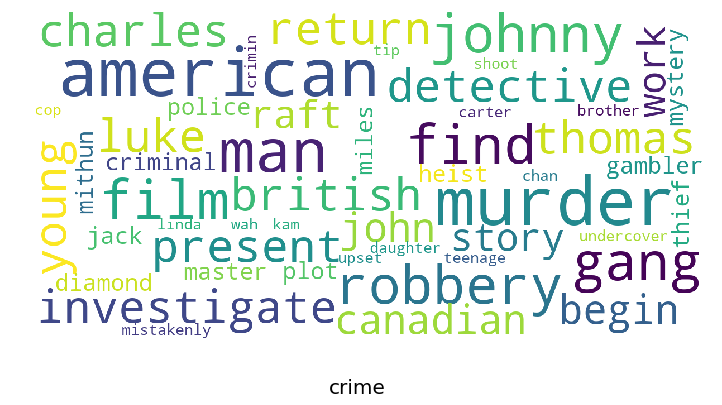

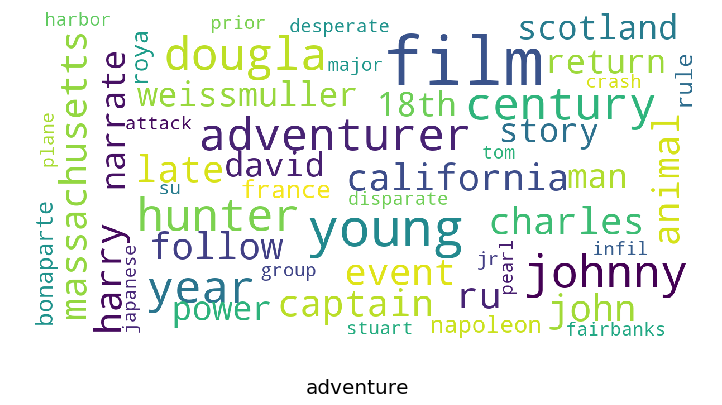

In [10]:
for genre in list(df['Genre'].unique()):
    show_wordcloud(df[df['Genre']==genre]['tokenized'], title=genre)

In [11]:
df['category_id'] = df['Genre'].factorize()[0]
category_id_df = df[['Genre', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Genre']].values)


In [48]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for Genre, category_id in sorted(category_to_id.items()):
    print(Genre, category_id)
    features_chi2 = chi2(train_features, y_train == Genre)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_train.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Genre))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

action 2
# 'action':
  . Most correlated unigrams:
. vijay
. terrorist
. henchman
. ninja
. mithun
  . Most correlated bigrams:
. 
adventure 8
# 'adventure':
  . Most correlated unigrams:
. adventurer
. musketeer
. tarzan
. ship
. pirate
  . Most correlated bigrams:
. 
comedy 4
# 'comedy':
  . Most correlated unigrams:
. murder
. stooge
. sach
. comedy
. kill
  . Most correlated bigrams:
. 
crime 7
# 'crime':
  . Most correlated unigrams:
. cheung
. racketeer
. racket
. criminal
. robbery
  . Most correlated bigrams:
. 
drama 1
# 'drama':
  . Most correlated unigrams:
. life
. killer
. kill
. child
. relationship
  . Most correlated bigrams:
. 
horror 0
# 'horror':
  . Most correlated unigrams:
. possess
. werewolf
. body
. creature
. vampire
  . Most correlated bigrams:
. 
romance 5
# 'romance':
  . Most correlated unigrams:
. varun
. priya
. reema
. rahul
. love
  . Most correlated bigrams:
. 
thriller 6
# 'thriller':
  . Most correlated unigrams:
. abductor
. killer
. milan
. phone


### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df['Plot']
y = df['Genre']

In [15]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= .8, random_state= 13)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Task #6: Build a pipeline to vectorize the date, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf_train = TfidfVectorizer(tokenizer=spacy_tokenizer,sublinear_tf=True, max_df=.8, min_df=10,  ngram_range=(1, 1))

In [58]:
train_features.mean()

0.0008535746500287805

In [18]:
train_features = tfidf_train.fit_transform(X_train).toarray()

In [19]:
test_features = tfidf_train.transform(X_test).toarray()

### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [17]:
scorer = metrics.make_scorer(metrics.f1_score, average = 'weighted')

In [18]:
params = {
 'max_depth': [10, 20],
 'max_features': [.5, 'sqrt'],
 'min_samples_leaf': [3,6],
 'n_estimators': [200, 350, 500]}

In [ ]:
rf =  RandomForestClassifier(verbose=1)

In [49]:
nb = MultinomialNB()

In [50]:
params=  {'alpha': [0.09, 0.1,0.11]}

In [51]:
# Instantiate the grid search model
grid_search_nb = GridSearchCV(estimator = nb,scoring=scorer, param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [52]:
grid_search_nb.fit(train_features, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   15.6s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.09, 0.1, 0.11]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [53]:
print(grid_search_nb.best_params_,
      grid_search_nb.best_score_)

{'alpha': 0.09} 0.5807380579948342


In [54]:
# Form a prediction set
preds_nb = grid_search_nb.best_estimator_.predict(test_features)

ValueError: shapes (3561,11790) and (10372,9) not aligned: 11790 (dim 1) != 10372 (dim 0)

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,preds_nb))

In [22]:
from sklearn import linear_model

In [26]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 1, 10)

# Create hyperparameter options
hyperparameters = dict(C=C)

In [27]:
# Create logistic regression
logistic = linear_model.LogisticRegression(penalty='l2', class_weight='balanced')

In [28]:
# Instantiate the grid search model
grid_search_LR = GridSearchCV(estimator = logistic,scoring=scorer, param_grid = hyperparameters, 
                          cv = 7, n_jobs = -1, verbose = 2)

In [29]:
grid_search_LR.fit(train_features, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.0min finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 1.     ,  1.29155,  1.6681 ,  2.15443,  2.78256,  3.59381,
        4.64159,  5.99484,  7.74264, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [30]:
print(grid_search_LR.best_params_,
      grid_search_LR.best_score_)

{'C': 2.154434690031884} 0.625915476149867


In [31]:
# Form a prediction set
preds_LR = grid_search_LR.best_estimator_.predict(test_features)

In [32]:
# Print a classification report
print(metrics.classification_report(y_test,preds_LR))

              precision    recall  f1-score   support

      action       0.54      0.59      0.56       162
   adventure       0.48      0.66      0.56        64
      comedy       0.70      0.68      0.69       547
       crime       0.32      0.56      0.41        50
       drama       0.71      0.63      0.67       781
      horror       0.78      0.81      0.79       177
     romance       0.40      0.48      0.44       120
    thriller       0.40      0.36      0.38       130
     western       0.83      0.89      0.86       106

   micro avg       0.64      0.64      0.64      2137
   macro avg       0.57      0.63      0.59      2137
weighted avg       0.65      0.64      0.65      2137



### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

In [33]:
tfidf = worde

(10682, 11790)

In [34]:
final_model = linear_model.LogisticRegression(class_weight='balanced', C= 2.154434690031884, penalty='l2')

In [35]:
final_model.fit(features, labels)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=2.154434690031884, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [36]:
df_test = pd.read_csv('movie_test.csv', index_col=0)

In [37]:
df_test.head()

,Release Year,Title,Plot,Director,Cast
5075,1950,Chain Gang,After a state senator's bill to abolish chain ...,Lew Landers,"Douglas Kennedy, Marjorie Lord"
32149,2003,Aithe,Irfan Khan (Pavan Malhotra) is a key mafia aff...,Chandrashekar Yeleti,"Sashank, Sindhu Tolani, Abhishek, Mohit"
7154,1958,Wild Heritage,The film tells the story of Emma Breslin (O'Su...,Charles Haas,"Will Rogers, Jr., Maureen O'Sullivan"
4259,1946,In Fast Company,The boys are involved in an altercation with a...,Del Lord,"The Bowery Boys, Jane Randolph"
7548,1961,"Stop, Look and Laugh",Paul Winchell plays a father to Jerry Mahoney ...,"Don Appell, Louis Brandt","Three Stooges, Paul Winchell"


In [38]:
test_features = tfidf.transform(df_test.Plot).toarray()
test_features.shape

(3561, 11790)

In [39]:
labels_test = final_model.predict(test_features)

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

In [43]:
labels_test

array(['drama', 'action', 'western', ..., 'crime', 'drama', 'thriller'],
      dtype=object)

In [45]:
answers = pd.DataFrame(labels_test, index=df_test.index)

In [46]:
answers.head()

,0
5075,drama
32149,action
7154,western
4259,comedy
7548,comedy


In [47]:
answers.to_csv('testlabels_saw.csv',header=None)

## Great job!